In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url ='https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day39-knn-imputer/train.csv'
df = pd.read_csv(url,usecols =['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
x = df.drop(columns =['Survived'])
y = df['Survived']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=2)

In [7]:
x_train['Age_imputed']=x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [8]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [9]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values


/var/folders/mp/ktrc96ws30v801fshnxv23mc0000gn/T/ipykernel_16611/641100643.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().s

In [10]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,26.0
493,71.0,49.5042,71.0
527,NaN,221.7792,56.0


/var/folders/mp/ktrc96ws30v801fshnxv23mc0000gn/T/ipykernel_16611/1887097303.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label ='Original',hist=False)
/var/folders/mp/ktrc96ws30v801fshnxv23mc0000gn/T/ipykernel_16611/1887097303.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

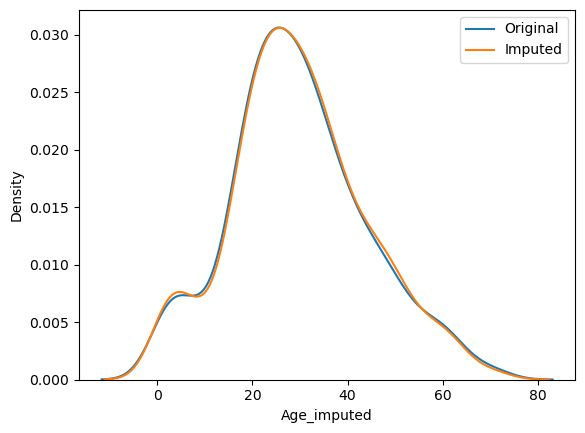

In [11]:
sns.distplot(x_train['Age'],label ='Original',hist=False)
sns.distplot(x_train['Age_imputed'],label='Imputed',hist=False)

plt.legend()
plt.show()

In [12]:
print('Original variable variance :',x_train['Age'].var())
print('Variance after random imputation : ',x_train['Age_imputed'].var())

Original variable variance : 204.3495133904614
Variance after random imputation :  201.680723655557


In [13]:
x_train[['Fare','Age','Age_imputed']].cov #covariance changes wrt other columns

<bound method DataFrame.cov of          Fare   Age  Age_imputed
30    27.7208  40.0         40.0
10    16.7000   4.0          4.0
873    9.0000  47.0         47.0
182   31.3875   9.0          9.0
876    9.8458  20.0         20.0
..        ...   ...          ...
534    8.6625  30.0         30.0
584    8.7125   NaN         26.0
493   49.5042  71.0         71.0
527  221.7792   NaN         56.0
168   25.9250   NaN         31.0

[712 rows x 3 columns]>

<Axes: >

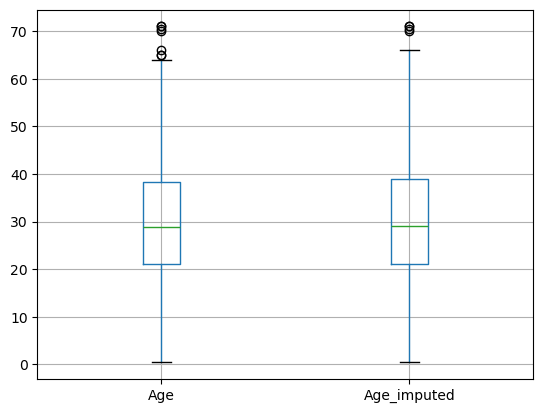

In [14]:
x_train[['Age','Age_imputed']].boxplot() #outliers remain the same

In [ ]:
sampled_value = x_train['Age'].dropna().sample(1,random_state=int(observation['Fare']))

In [15]:
url = 'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day38-missing-indicator/house-train.csv'
data = pd.read_csv(url,usecols = ['GarageQual','FireplaceQu','SalePrice'])

In [16]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [17]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [18]:
x = data
y = data['SalePrice']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=2)

In [20]:
x_train['GarageQual_imputed'] = x_train['GarageQual']
x_test['GarageQual_imputed'] = x_test['GarageQual']

x_train['FireplaceQu_imputed'] = x_train['FireplaceQu']
x_test['FireplaceQu_imputed'] = x_test['FireplaceQu']

In [21]:
x_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
399,NaN,TA,241000,TA,NaN
1051,Gd,TA,200141,TA,Gd
345,Gd,TA,140200,TA,Gd
1209,Gd,TA,290000,TA,Gd
1416,NaN,TA,122500,TA,NaN


In [22]:
x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values

x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
x_test['FireplaceQu_imputed'][x_test['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isnull().sum()).values

/var/folders/mp/ktrc96ws30v801fshnxv23mc0000gn/T/ipykernel_16611/4277669966.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_t

In [23]:
x_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
706,TA,TA,302000,TA,TA
709,NaN,TA,109900,TA,Gd
151,Gd,TA,372402,TA,Gd
675,TA,TA,148500,TA,TA
1203,TA,TA,213000,TA,TA


In [24]:
temp = pd.concat([
    x_train['GarageQual'].value_counts()/len(x_train['GarageQual'].dropna()),
    x_train['GarageQual_imputed'].value_counts()/len(x_train)
   
],axis=1)
temp.columns = ['original','imputed']

In [25]:
temp

,original,imputed
TA,0.951043,0.951199
Fa,0.037171,0.036815
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [37]:
temp1 = pd.concat([
    x_train['FireplaceQu'].value_counts()/len(x_train['FireplaceQu'].dropna()),
    x_train['FireplaceQu_imputed'].value_counts()/len(x_train)
   
],axis=1)
temp1.columns = ['original','imputed']

In [38]:
temp1

,original,imputed
Gd,0.494272,0.494007
TA,0.412439,0.415240
Fa,0.040917,0.040240
Po,0.027823,0.027397
Ex,0.024550,0.023116


/var/folders/mp/ktrc96ws30v801fshnxv23mc0000gn/T/ipykernel_16611/175730529.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist = False,label=category)
/var/folders/mp/ktrc96ws30v801fshnxv23mc0000gn/T/ipykernel_16611/175730529.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github

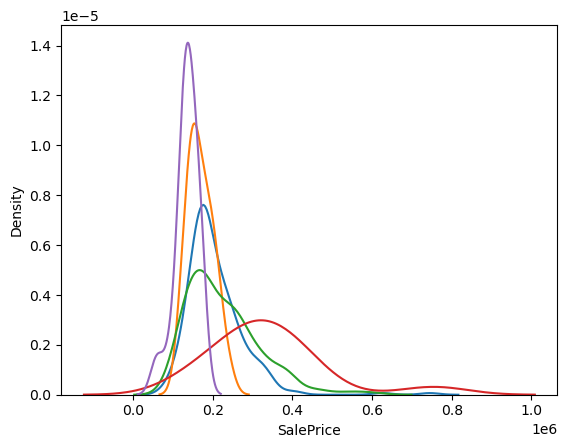

In [33]:
for category in x_train['FireplaceQu'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist = False,label=category)

plt.show()

/var/folders/mp/ktrc96ws30v801fshnxv23mc0000gn/T/ipykernel_16611/979295335.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'],hist = False,label=category)
/var/folders/mp/ktrc96ws30v801fshnxv23mc0000gn/T/ipykernel_16611/979295335.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gis

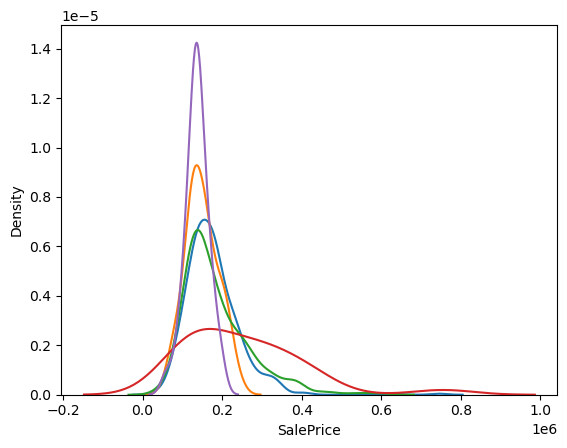

In [34]:
for category in x_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'],hist = False,label=category)

plt.show()